<a href="https://colab.research.google.com/github/Yennanng/PTDLNC/blob/Day3/Regression_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Linear Regression

#1. The California Housing
The California Housing dataset is a popular dataset included in the sklearn library, which is often used for machine learning and regression tasks. It contains information about housing prices and other related attributes in California districts, collected from the 1990 U.S. Census. The target variable is the median house value for California districts, making it a classic dataset for supervised regression tasks.

Các trường (field) sau:

MedInc: Median Income: Thu nhập trung vị của các hộ gia đình trong block (nghìn USD).Đây là biến giải thích quan trọng để dự đoán giá nhà.

HouseAge: Median House Age: Tuổi trung vị của các căn nhà trong block (tính bằng năm).

AveRooms: Average Rooms: Số phòng trung bình trên mỗi hộ trong block.Được tính bằng tổng số phòng chia cho số hộ.

AveBedrms: Average Bedrooms: Số phòng ngủ trung bình trên mỗi hộ.Tính bằng tổng số phòng ngủ chia cho số hộ.

Population:Dân số của block (tổng số người).

AveOccup: Average Occupancy: Số người trung bình trong mỗi hộ. Tính bằng dân số chia cho số hộ.

Latitude: Vĩ độ của block (tọa độ địa lý).

Longitude: Kinh độ của block (tọa độ địa lý).

MedHouseVal: Median House Value: Giá trị trung vị của các căn nhà trong block (đơn vị: 100.000 USD). Đây là biến mục tiêu (target).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
#load data
import gdown
url = "https://drive.google.com/uc?id=1mi0bB0xF3yfM2cjpeZHnmU52ZKNM1Vl6"
file_path = "california_housing.xlsx"
gdown.download(url, file_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1mi0bB0xF3yfM2cjpeZHnmU52ZKNM1Vl6
To: /content/california_housing.xlsx
100%|██████████| 1.69M/1.69M [00:00<00:00, 58.9MB/s]


'california_housing.xlsx'

In [4]:
df = pd.read_excel(file_path)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


In [ ]:
X = df[['MedInc']] # Use only the 'MedInc' feature as a DataFrame
y = df['MedHouseVal'] # Target variable: Median house value
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [6]:
y

NameError: name 'y' is not defined

Mean Squared Error: 0.7011
Model Coefficient: 0.4179
Model Intercept: 0.4509
R-squared: 0.4734


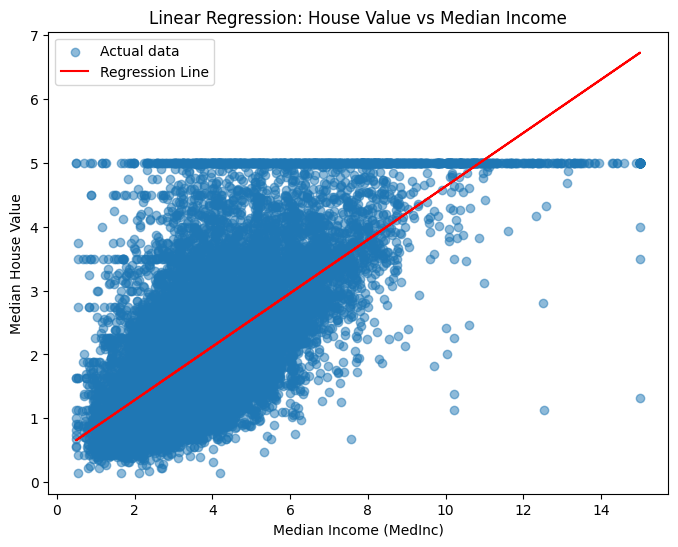

In [8]:
# Select features and target variable
X = df[['MedInc']] # Use only the 'MedInc' feature as a DataFrame
y = df['MedHouseVal'] # Target variable: Median house value

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make predictions
y_hat = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_hat)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Model Coefficient: {model.coef_[0]:.4f}")
print(f"Model Intercept: {model.intercept_:.4f}")

# Compute R-squared using sklearn
r_squared_sklearn = model.score(X, y)
print(f"R-squared: {r_squared_sklearn:.4f}")

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.5, label='Actual data')
plt.plot(X, y_hat, color='red', label='Regression Line')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value')
plt.title('Linear Regression: House Value vs Median Income')
plt.legend()
plt.show()

**Multiple Linear regression**

In [9]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.34476576],
       [ 2.33223796],
       [ 1.7826994 ],
       ...,
       [-1.14259331],
       [-1.05458292],
       [-0.78012947]])

# Không Normalization

In [11]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# X is already defined as df in a previous cell, so no need to redefine here
X= df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal'] # Target variable: Median house value

# Assign X_scaled to X without scaling
X_scaled = X

# Add a constant for the intercept (required for statsmodels)
X_scaled = sm.add_constant(X_scaled)

# Fit a Linear Regression model using statsmodels
model = sm.OLS(y, X_scaled)
results = model.fit()

# Extract coefficients, p-values, and confidence intervals
conf_int = results.conf_int()  # Confidence interval as a DataFrame
feature_names = ['const'] + list(X.columns)  # Corrected: use X.columns for feature names
summary = pd.DataFrame({
    'Feature': feature_names,  # Updated feature names
    'Coefficient': results.params,
    'P-Value': results.pvalues,
    'Confidence Interval (Lower)': conf_int.iloc[:, 0],  # Lower bound
    'Confidence Interval (Upper)': conf_int.iloc[:, 1]   # Upper bound
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Print the summary table
print("Linear Regression Summary:")
print(summary)


# Compute and print R-squared
r_squared = results.rsquared
print(f"R-squared: {r_squared:.4f}")

# Compute and print Adjusted R-squared
adjusted_r_squared = results.rsquared_adj
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")

Linear Regression Summary:
               Feature  Coefficient        P-Value  \
const            const   -36.941920   0.000000e+00   
AveBedrms    AveBedrms     0.645066  6.725726e-115   
MedInc          MedInc     0.436693   0.000000e+00   
Longitude    Longitude    -0.434514   0.000000e+00   
Latitude      Latitude    -0.421314   0.000000e+00   
AveRooms      AveRooms    -0.107322   1.026311e-73   
HouseAge      HouseAge     0.009436   3.505485e-98   
AveOccup      AveOccup    -0.003787   8.303694e-15   
Population  Population    -0.000004   4.024472e-01   

            Confidence Interval (Lower)  Confidence Interval (Upper)  
const                        -38.233405                   -35.650435  
AveBedrms                      0.589919                     0.700212  
MedInc                         0.428467                     0.444919  
Longitude                     -0.449279                    -0.419749  
Latitude                      -0.435421                    -0.407208  
AveRoo

# Normalization

Linear Regression Summary:
          Feature  Coefficient        P-Value  Confidence Interval (Lower)  \
const   Intercept     2.068558   0.000000e+00                     2.058677   
x7       Latitude    -0.899886   0.000000e+00                    -0.930016   
x8      Longitude    -0.870541   0.000000e+00                    -0.900123   
x1         MedInc     0.829619   0.000000e+00                     0.813992   
x4      AveBedrms     0.305696  6.725726e-115                     0.279562   
x3       AveRooms    -0.265527   1.026311e-73                    -0.294068   
x2       HouseAge     0.118752   3.505485e-98                     0.107743   
x6       AveOccup    -0.039326   8.303694e-15                    -0.049249   
x5     Population    -0.004503   4.024472e-01                    -0.015045   

       Confidence Interval (Upper)  
const                     2.078439  
x7                       -0.869756  
x8                       -0.840959  
x1                        0.845247  
x4     

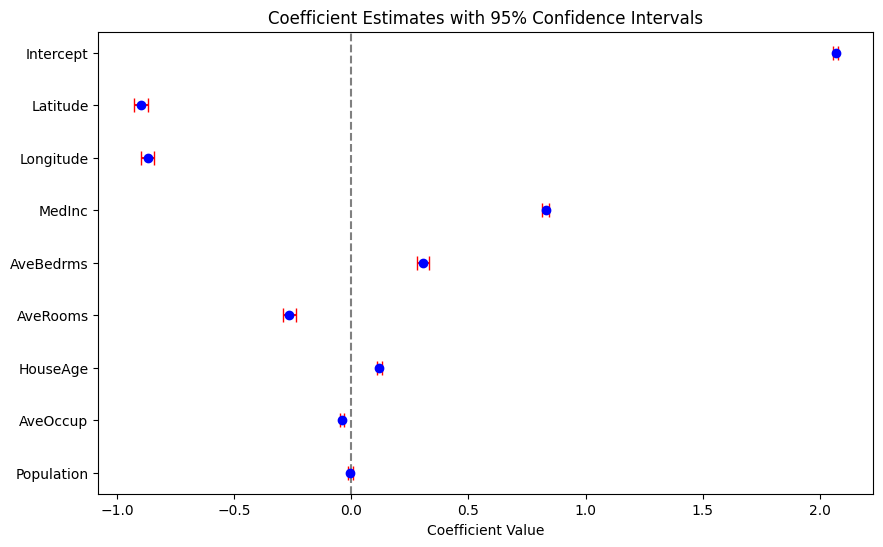

R-squared: 0.6062
Adjusted R-squared: 0.6061


In [ ]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# X is already defined as df in a previous cell, so no need to redefine here
X= df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal'] # Target variable: Median house value

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a constant for the intercept (required for statsmodels)
X_scaled = sm.add_constant(X_scaled)

# Fit a Linear Regression model using statsmodels
model = sm.OLS(y, X_scaled)
results = model.fit()

# Extract coefficients, p-values, and confidence intervals
conf_int = results.conf_int()  # Confidence interval as a DataFrame
feature_names = ['Intercept'] + list(X.columns)  # Corrected: use X.columns for feature names
summary = pd.DataFrame({
    'Feature': feature_names,  # Updated feature names
    'Coefficient': results.params,
    'P-Value': results.pvalues,
    'Confidence Interval (Lower)': conf_int.iloc[:, 0],  # Lower bound
    'Confidence Interval (Upper)': conf_int.iloc[:, 1]   # Upper bound
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Print the summary table
print("Linear Regression Summary:")
print(summary)

# Plot coefficients with confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(
    summary['Coefficient'],
    summary['Feature'],
    xerr=(summary['Coefficient'] - summary['Confidence Interval (Lower)'],
          summary['Confidence Interval (Upper)'] - summary['Coefficient']),
    fmt='o', color='blue', ecolor='red', capsize=5
)
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Coefficient Value')
plt.title('Coefficient Estimates with 95% Confidence Intervals')
plt.gca().invert_yaxis()
plt.show()

# Compute and print R-squared
r_squared = results.rsquared
print(f"R-squared: {r_squared:.4f}")

# Compute and print Adjusted R-squared
adjusted_r_squared = results.rsquared_adj
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")

**Prediction model**

**Use Differenet Split by change random_state**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
#load data
import gdown
url = "https://drive.google.com/uc?id=1mi0bB0xF3yfM2cjpeZHnmU52ZKNM1Vl6"
file_path = "california_housing.xlsx"
gdown.download(url, file_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1mi0bB0xF3yfM2cjpeZHnmU52ZKNM1Vl6
To: /content/california_housing.xlsx
100%|██████████| 1.69M/1.69M [00:00<00:00, 137MB/s]


'california_housing.xlsx'

In [ ]:
df = pd.read_excel(file_path)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

Mean Squared Error MSE: 0.5410
RMSE: 0.7355
MAE: 0.5409622217186033

Feature Importance:
      Feature  Coefficient
6    Latitude    -0.883595
7   Longitude    -0.855218
0      MedInc     0.832808
3   AveBedrms     0.307361
2    AveRooms    -0.290751
1    HouseAge     0.117152
5    AveOccup    -0.035491
4  Population    -0.008151


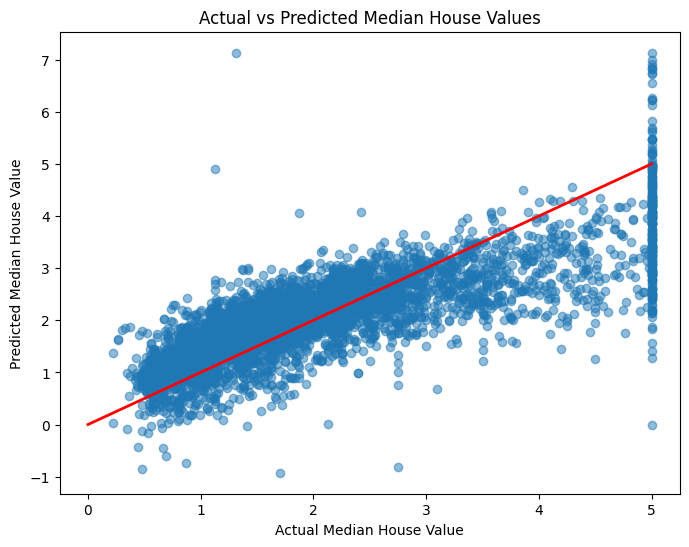

In [ ]:


X= df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal'] # Target variable: Median house value

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=20)
# Create a Linear Regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print("MAE:", mae)
# Display feature coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns, # Corrected: Use X.columns for feature names
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature Importance:")
print(coefficients)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 5], [0, 5], color='red', linewidth=2)  # Diagonal line for reference
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Values")
plt.show()

#2. ToyotaCorolla
The ToyotaCorolla.csv dataset contains information about various features of Toyota Corolla cars, including their prices and attributes. The target variable is usually the car's price, making this dataset ideal for regression tasks.

In [ ]:
# Download UniversalBank.csv data file and save to Colab
!wget https://github.com/DanielTrieu/data_analytic/raw/refs/heads/main/data/ToyotaCorolla.csv

--2025-09-14 06:54:00--  https://github.com/DanielTrieu/data_analytic/raw/refs/heads/main/data/ToyotaCorolla.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DanielTrieu/data_analytic/refs/heads/main/data/ToyotaCorolla.csv [following]
--2025-09-14 06:54:00--  https://raw.githubusercontent.com/DanielTrieu/data_analytic/refs/heads/main/data/ToyotaCorolla.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 226784 (221K) [text/plain]
Saving to: ‘ToyotaCorolla.csv’

ToyotaCorolla.csv   100%[===================>] 221.47K  --.-KB/s    in 0.04s   

2025-09-14 06:54:00 (6.02 MB/s) - ‘ToyotaCorolla.csv

In [ ]:
!pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 77.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

Colab environment detected.


In [ ]:
#Select columns for regression analysis
car_df = pd.read_csv('ToyotaCorolla.csv')
car_df


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,0,1,1,1,0,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,1,0,0,1,1,0,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,1,0,0,0,1,0,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Define predictors and outcome variable
predictors = [
    'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color',
    'Automatic', 'CC', 'Doors', 'Quarterly_Tax', 'Weight'
]
outcome = 'Price'

# Prepare the feature matrix (X) and target vector (y)
X = pd.get_dummies(car_df[predictors], drop_first=True)  # Handle categorical variables
y = car_df[outcome]

print("X", X)
print()
print ("y", y)

X       Age_08_04     KM   HP  Met_Color  Automatic    CC  Doors  Quarterly_Tax  \
0            23  46986   90          1          0  2000      3            210   
1            23  72937   90          1          0  2000      3            210   
2            24  41711   90          1          0  2000      3            210   
3            26  48000   90          0          0  2000      3            210   
4            30  38500   90          0          0  2000      3            210   
...         ...    ...  ...        ...        ...   ...    ...            ...   
1431         69  20544   86          1          0  1300      3             69   
1432         72  19000   86          0          0  1300      3             69   
1433         71  17016   86          0          0  1300      3             69   
1434         70  16916   86          1          0  1300      3             69   
1435         76      1  110          0          0  1600      5             19   

      Weight  Fuel_Type_D

In [ ]:
# Split the data into training and validation sets
train_X, valid_X, train_y, valid_y = train_test_split(
    X, y, test_size=0.4, random_state=1
)

# Train the linear regression model
car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# Print coefficients
coefficients = pd.DataFrame({'Predictor': X.columns, 'Coefficient': car_lm.coef_})
print("Regression Coefficients:")
print(coefficients)

# Evaluate model performance on the training data
print("\nPerformance Summary (Training Data):")
regressionSummary(train_y, car_lm.predict(train_X))

Regression Coefficients:
           Predictor  Coefficient
0          Age_08_04  -124.110305
1                 KM    -0.016059
2                 HP    75.549218
3          Met_Color    47.715778
4          Automatic   462.441526
5                 CC    -5.027585
6              Doors    58.417871
7      Quarterly_Tax    13.009195
8             Weight    14.156177
9   Fuel_Type_Diesel  4481.088703
10  Fuel_Type_Petrol  2413.063717

Performance Summary (Training Data):

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1315.5318
            Mean Absolute Error (MAE) : 953.7443
          Mean Percentage Error (MPE) : -1.0544
Mean Absolute Percentage Error (MAPE) : 9.2370


In [ ]:
# Use predict() to make predictions on a new set
car_lm_pred = car_lm.predict(valid_X)
result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': valid_y,
'Residual': valid_y - car_lm_pred})
print(result.head(20))
# print performance measures (validation data)
regressionSummary(valid_y, car_lm_pred)

         Predicted  Actual     Residual
509   12323.811858   10900 -1423.811858
435   11177.152249   10895  -282.152249
321   14033.803003   10750 -3283.803003
1055   6413.897879    6500    86.102121
288   12724.302918   11895  -829.302918
48    18226.582638   17950  -276.582638
1403   7665.856654    7000  -665.856654
952    9961.900457    8400 -1561.900457
1097   7182.829823    7250    67.170177
204   11985.986724   12950   964.013276
978    9556.854777    8745  -811.854777
404    9938.011124    9450  -488.011124
1338   7456.762516    7499    42.237484
754    8953.201306    9950   996.798694
1189   6873.469434    8500  1626.530566
948    8266.616892    7750  -516.616892
1079   6140.669878    8950  2809.330122
1108   7274.154503    8250   975.845497
107   17074.195776   17450   375.804224
1065   5951.980341    6550   598.019659

Regression statistics

                      Mean Error (ME) : 190.6887
       Root Mean Squared Error (RMSE) : 3315.7836
            Mean Absolute Error (MAE)

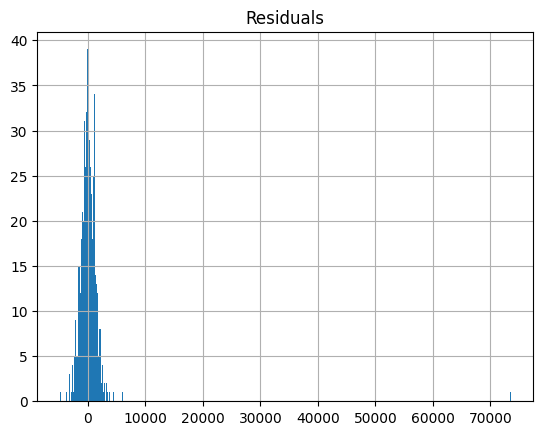

In [ ]:
car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred
pd.DataFrame({'Residuals': all_residuals}).hist(bins=500)
plt.show()